In [ ]:
102*36

In [1]:
import sys
print(sys.path)
sys.path.insert(1,'/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/ITE-1.1_code')
sys.path.insert(1,'/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/')
from latentNoise_funcs_gen import *
from ANLSMN_genfuncs import *
from processResults import *




%load_ext autoreload
%autoreload 2


['/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/notebooks', '/home/emiliano/anaconda3/lib/python37.zip', '/home/emiliano/anaconda3/lib/python3.7', '/home/emiliano/anaconda3/lib/python3.7/lib-dynload', '', '/home/emiliano/anaconda3/lib/python3.7/site-packages', '/home/emiliano/anaconda3/lib/python3.7/site-packages/locket-0.2.1-py3.7.egg', '/home/emiliano/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/emiliano/.ipython']
bla
[1] "in func_entropy_v1.R"
2022-02-28 15:38:48,313:WARNING:R[write to console]: Loading required package: spam

2022-02-28 15:38:48,317:WARNING:R[write to console]: Loading required package: dotCall64

2022-02-28 15:38:48,324:WARNING:R[write to console]: Loading required package: grid

2022-02-28 15:38:48,634:WARNING:R[write to console]: Spam version 2.3-0 (2019-09-13) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the

In [2]:
r["source"]("func_entropy_v1.R")

[1] "in func_entropy_v1.R"


value,[RTYPES.CLOSXP]
visible,[RTYPES.LGLSXP]


In [3]:
funcs_r = robjects.globalenv

In [4]:
import jax.numpy as np
import numpy as onp 
import pandas as pd
import pickle5 as pickle5
import pickle 
import time
import json
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import bisect
import itertools
from scipy.spatial import distance

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

from fairlearn.reductions import ExponentiatedGradient, DemographicParity 
from sklearn.tree import DecisionTreeClassifier
from fairlearn.metrics import MetricFrame, selection_rate, count
import sklearn.metrics as skm

from sklearn.utils import check_random_state



In [5]:
import sklearn as sk
sk.__version__

'0.24.1'

In [6]:
pd.__version__

'1.1.0'

# Read in Experiments

In [7]:
readIn = True
correctMse = False

In [8]:
file =  "latent_noise"


num_data = 100


num_data = 300
num_data = 1002
num_data = 302
num_data = 100

reposData = "/home/emiliano/Documents/ISP/proyectos/causality/causaLearner_R_pkg/causaLearner/data/"
fileDict = {"SIM-1000_withZ":['SIMc'], "ANLSMN_withZ":['AN', 'LS-s']}
fileDict = {"TCEP-all":['tcep'], "SIM-1000_withZ":['SIM', 'SIMc', 'SIMG', 'SIMln'], "ANLSMN_withZ":['AN', 'AN-s', 'LS', 'LS-s',
       'MN-U']}
fileDict = {"ANLSMN_withZ":['LS-s']}


#fileDict = {"ANLSMN_withZ":['LS-s']}

fileDict = {"TCEP-all":['tcep'], "SIM-1000_withZ":['SIM', 'SIMc', 'SIMG', 'SIMln'], "ANLSMN_withZ":['AN', 'AN-s', 'LS', 'LS-s',
       'MN-U']}
fileDict = {"TCEP-all":['tcep'], "ANLSMN_withZ":['LS-s','MN-U']}
fileDict = {"ANLSMN_withZ":['LS-s']}


#fileDict = {"SIM-1000_withZ":['SIM'], "ANLSMN_withZ":['LS-s','MN-U']}

In [9]:



version = "v3_optType"
version = "res_sens_hyperpars_v0"
version = "res_sens_logPlus1_v0"
version = "res_sens_noLog_v0"
version = "res_sens_sigz_v0"
version = "res_sens_sigx_v0"
version = "res_sens_sigxz_v0"
version = "res_sens_optSigz_v0"
version = "res_sens_optSigx_v0"
version = "res_sens_optSigxz_v0"

version = "res_sens_crossKernel_v0"
version = "res_sens_optSigxz_divorced_v0"
version = "res_sens_optSigx_divorced_v0"
version = "res_sens_optSigz_divorced_v0"

version = "res_sens_algoDep_v0"
version = "res_sens_batchSize_v0"
version = "res_sens_reps_v0"
version = "res_sens_epochs_v0"


version = "res_sens_learningRate_v0"
version = "res_sens_eta_v0"
version = "res_sens_nu_v0"
version = "res_sens_batchSize_v1"
version = "res_sens_optSigxz_noEtaBeta_v0"


version = "res_sens_optSigz_objFunc_v0"
version = "res_sens_optSigxz_objFunc_v0"


version = "res_sens_optSigx_objFunc_v0"
version = "res_sens_batchSize_v2"


version = "res_sens_learningRate_v1"
version = "res_sens_eta_v1"

version = "res_sens_smplNoSeed_v0"

version = "res_sens_noRescale_v0"
version = "res_sens_noRescale_v1"
version = "res_sens_noRescale_v2"

version = "res_sens_smplNoReplace_v0"

version = "res_sens_sigx_divorced_v0"
version = "res_sens_sigz_divorced_v0"
version = "res_sens_sigxz_divorced_v0"

version = "res_sens_sigx_objFunc_v0"
version = "res_sens_sigz_objFunc_v0"
version = "res_sens_sigxz_objFunc_v0"

version = "res_sens_sigr_objFunc_v0"
version = "res_sens_sigr_objFunc_v1"

version = "res_sens_optSigr_objFunc_v0"


version = "res_sens_crossKernel_withOpt_v0"
version = "res_sens_crossKernel_withOpt_v1"
version = "res_sens_crossKernel_withOpt_v2"
version = "res_sens_crossKernel_withOpt_v3"


version = "res_sens_myKernel2_withOpt_v0"
version = "res_sens_myKernel3_withOpt_v0"


version = "greedy_search_v1"
version = "greedy_search_v0"
version = "greedy_search_v2"
version = "greedy_search_v0b"
version = "greedy_search_v0c"
version = "greedy_search_v0d"
version = "greedy_search_v3b"
version = "greedy_search_v0e"
version = "greedy_search_v0f"
version = "greedy_search_v0g"
version = "greedy_search_v5g"
version = "greedy_search_v4g"
version = "greedy_search_v7g"
version = "greedy_search_v8g"
version = "greedy_search_v9g"
version = "greedy_search_v10g"
version = "greedy_search_v11g"
version = "greedy_search_v7g"
version = "greedy_search_v12g"
version = "greedy_search_v6g"
version = "greedy_search_v13g"
version = "greedy_search_v14g"
version = "greedy_search_v7g_b"

version = "greedy_search_v15g"
version = "greedy_search_v16g"
version = "greedy_search_v17g"

version = "greedy_search_v7g_c"
version = "greedy_search_v7g_d"

version = "greedy_search_tcep_v0"
version = "greedy_search_tcep_v1"
version = "greedy_search_tcep_v2"
version = "greedy_search_tcep_v3"
version = "greedy_search_tcep_v4"
version = "greedy_search_tcep_v5"
version = "greedy_search_tcep_v6"
version = "greedy_search_tcep_v9"

version = "greedy_search_tcep_v10"
version = "greedy_search_tcep_v11"

version = "v3_optType"
version = "greedy_search_tcep_v12"
version = "greedy_search_tcep_v13"

version = "greedy_search_tcep_v8"
version = "greedy_search_tcep_v7"

version = "greedy_search_tcep_v14"

version = "greedy_search_tcep_v16"
version = "greedy_search_tcep_v17a"
version = "greedy_search_tcep_v18"
version = "greedy_search_tcep_v15"
version = "greedy_search_tcep_v19"
version = "greedy_search_tcep_v20"
version = "greedy_search_tcep_v21"
version = "greedy_search_tcep_v22"

# parrs version = "v3_optType"
pars= {"lambda":[0.01, 0.1, 1],
           "eta":[0.01],
    "beta":[0.1, 1.0, 10.0],
       "neta":[0.001, 0.01, 0.1],
        "nu":[10.0],
        "lu":[0.0, 1.0],
        "lr":[0.1],
        "ot":["freeZ"]}


# pars version = "res_sens_logPlus1_v0"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "eta": [0.01],
            "beta": [0.001, 0.01, 0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}


# pars version = "res_sens_noLog_v0"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "eta": [0.01],
            "beta": [0.001, 0.01, 0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}



# pars version = "res_sens_batchSize_v0"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "sig":[0.5],
            "eta": [0.01],
            "beta": [0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[75, 100, 200],
            "reps":[5]}



# pars version = "res_sens_reps_v0"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "sig":[0.5],
            "eta": [0.01],
            "beta": [0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[100],
            "reps":[3, 10, 20]}

# pars version = "res_sens_epochs_v0"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "sig":[0.5],
            "eta": [0.01],
            "beta": [0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [250, 500, 1000],
            "bs":[100],
            "reps":[5]}

# pars version = "res_sens_learningRate_v0"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "sig":[0.5],
            "eta": [0.01],
            "beta": [0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.05,0.2,0.5],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[100],
            "reps":[5]}

# pars version = "res_sens_eta_v0"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "sig":[0.5],
            "eta": [0.0, 0.1, 1.0],
            "beta": [0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[100],
            "reps":[5]}

# pars version = "res_sens_nu_v0"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "sig":[0.5],
            "eta": [0.01],
            "beta": [0.1],
            "neta": [0.01],
            "nu": [0.0, 0.1, 1],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[100],
            "reps":[5]}

# pars version = "res_sens_batchSize_v1"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "sig":[0.5],
            "eta": [0.01],
            "beta": [0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[300, 400, 500],
            "reps":[5]}

# pars version = "res_sens_optSigxz_noEtaBeta_v0"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "sig":[0.5],
            "eta": [0.0],
            "beta": [0.0],
            "neta": [0.001, 0.01, 0.1],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[100],
            "reps":[5]}





# pars version = "res_sens_optSigz_v0","res_sens_optSigx_v0", "res_sens_optSigxz_v0", 
#"res_sens_crossKernel_v0", "res_sens_crossKernel_withOpt_v0"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "sig":[0.5],
            "eta": [0.01],
            "beta": [0.001, 0.01, 0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}


# pars version = "res_sens_batchSize_v2"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "sig":[0.5],
            "eta": [0.01],
            "beta": [0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[750, 1000],
            "reps":[5]}

# pars version = "res_sens_learningRate_v0"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "sig":[0.5],
            "eta": [0.01],
            "beta": [0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1,0.2,0.3],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[100],
            "reps":[5]}

# pars version = "res_sens_eta_v1"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "sig":[0.5],
            "eta": [0.0, 0.01, 0.1],
            "beta": [0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[100],
            "reps":[5]}



# pars version = "res_sens_hyperpars_v0", "res_sens_noRescale_v0,1,2"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
        "sig":[0.5],
            "eta": [0.01],
            "beta": [0.001, 0.01, 0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}


# pars version = "res_sens_smplNoReplace_v0"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "sig":[0.5],
            "eta": [0.01],
            "beta": [0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[100, 200, 300],
            "reps":[5]}

# pars version = "res_sens_sigz_v0", "res_sens_sigx_v0", "res_sens_sigxz_v0"
pars = {"lambda": [0.001, 0.01, 0.1],
            "sig": [0.01, 0.1, 0.3, 0.7, 0.9, 0.99],
            "eta": [0.01],
            "beta": [0.01],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "res_sens_sigr_v1"
pars = {"lambda": [0.001, 0.01, 0.1],
            "sig": [0.3, 0.7, 0.9, 0.99],
            "eta": [0.01],
            "beta": [0.01],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "res_sens_hyperpars_v0", "res_sens_smplNoSeed_v0"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "eta": [0.01],
            "beta": [0.001, 0.01, 0.1],
            "neta": [0.01],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "greedy_search_v0"
pars = {"lambda": [0.01],
            "eta": [0.01],
            "beta": [0.1, 1.0, 10.0],
            "neta": [0.01, 0.1],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "greedy_search_v0b"
pars = {"lambda": [0.01],
            "eta": [0.01],
            "beta": [0.01, 0.1, 1.0],
            "neta": [0.01, 0.1, 1.0],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "greedy_search_v0c"
pars = {"lambda": [0.01],
            "eta": [0.01],
            "beta": [0.01, 0.1],
            "neta": [0.001, 0.01, 0.1, 1.0, 10.0],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "greedy_search_v0d"
pars = {"lambda": [0.01],
            "eta": [0.01],
            "beta": [0.01, 0.1],
            "neta": [0.01, 0.025, 0.05, 0.075, 0.1],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "greedy_search_v3b"
pars = {"lambda": [0.01],
            "eta": [0.01],
            "beta": [0.01, 0.1, 1.0],
            "neta": [0.01, 0.1, 1.0],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "greedy_search_v0e"
pars = {"lambda": [0.01],
            "eta": [0.01],
            "beta": [0.01, 0.1, 1.0, 10.0],
            "neta": [0.01, 0.1],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "greedy_search_v0f"
pars = {"lambda": [0.01],
            "eta": [0.01],
            "beta": [0.1, 1.0, 10.0, 100.0],
            "neta": [0.01, 0.1, 0.5],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}


# pars version = "greedy_search_v8g"
pars = {"lambda": [0.001, 0.01, 0.1, 1.0],
            "eta": [0.01],
            "beta": [0.1, 1.0, 10.0],
            "neta": [0.01, 0.1],
            "nu": [0.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "greedy_search_v9g"
pars = {"lambda": [0.001, 0.01, 0.1, 1.0],
            "eta": [0.1],
            "beta": [0.1, 1.0, 10.0],
            "neta": [0.01, 0.1],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "greedy_search_v10g"
pars = {"lambda": [0.001, 0.01, 0.1, 1.0],
            "eta": [0.0],
            "beta": [0.1, 1.0, 10.0],
            "neta": [0.01, 0.1],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}



# pars version = "greedy_search_v12g"
pars = {"lambda": [0.001, 0.01, 0.1, 1.0],
            "eta": [0.01],
            "beta": [0.1, 1.0, 10.0],
            "neta": [0.01, 0.05, 0.1],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "greedy_search_v0g"
pars = {"lambda": [0.001, 0.01, 0.1, 1.0],
            "eta": [0.01],
            "beta": [0.1, 1.0, 10.0],
            "neta": [0.01, 0.1],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}


# pars version = "greedy_search_v7g_b"
pars = {"lambda": [0.00001, 0.0001, 0.001, 0.01],
            "eta": [1.0],
            "beta": [0.1, 1.0, 10.0],
            "neta": [1.0, 10.0],
            "nu": [1000.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

    


# pars version = "greedy_search_v15g"
pars = {"lambda": [0.0001, 0.001, 0.01, 0.1],
            "eta": [1.0],
            "beta": [0.1],
            "neta": [1.0],
            "nu": [1000.0],
            "lu": [0.0],
            "ot": ["freeZ"],
            "bs":[100, 200, 300]}
    
# pars version = "greedy_search_v7g_c"
pars = {"lambda": [0.001, 0.01, 0.1, 1.0],
            "eta": [1.0],
            "beta": [0.1, 1.0, 10.0],
            "neta": [1.0, 10.0],
            "nu": [1000.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}




# parrs version = "v3_optType"
pars= {"lambda":[0.01, 0.1, 1],
           "eta":[0.01],
    "beta":[0.1, 1.0, 10.0],
       "neta":[0.001, 0.01, 0.1],
        "nu":[10.0],
        "lu":[0.0, 1.0],
        "lr":[0.1],
        "ot":["freeZ"]}

# pars version = "greedy_search_tcep_v11"
pars = {"lambda": [0.001, 0.01, 0.1, 1.0],
            "eta": [10.0],
            "beta": [0.1, 1.0, 10.0],
            "neta": [1.0, 10.0,100.0],
            "nu": [10000.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}


pars = {"lambda": [0.001, 0.01, 0.1, 1.0],
            "sig":[0.5],
            "eta": [0.001],
            "beta": [0.1, 1.0, 10.0],
            "neta": [0.001,0.01, 0.1],
            "nu": [10.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[100],
            "reps":[7]}


# pars version = "greedy_search_tcep_v8"
pars = {"lambda": [0.001, 0.01, 0.1, 1.0],
            "eta": [10.0],
            "beta": [0.1, 1.0, 10.0],
            "neta": [1.0, 10.0,100.0],
            "nu": [1000.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "greedy_search_tcep_v7"
pars = {"lambda": [0.001, 0.01, 0.1, 1.0],
            "eta": [1.0],
            "beta": [0.1, 1.0, 10.0],
            "neta": [1.0, 10.0,100.0],
            "nu": [1000.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"]}

# pars version = "greedy_search_tcep_v14"
pars = {"lambda": [0.001, 0.01, 0.1, 1.0],
            "sig":[0.5],
            "eta": [1.0],
            "beta": [0.1, 1.0, 10.0],
            "neta": [1.0,10.0, 100.0],
            "nu": [10000.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[100],
            "reps":[7]}





# pars version = "greedy_search_tcep_v17"
pars = {"lambda": [0.001, 0.01, 0.1, 1.0],
            "sig":[0.5],
            "eta": [0.1],
            "beta": [0.1, 1.0, 10.0],
            "neta": [0.1, 1.0, 10.0],
            "nu": [1000.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[100],
            "reps":[10]}

# pars version = "greedy_search_tcep_v15"
pars = {"lambda": [0.001, 0.01, 0.1, 1.0],
            "sig":[0.5],
            "eta": [0.1],
            "beta": [0.1, 1.0, 10.0],
            "neta": [0.1, 1.0, 10.0],
            "nu": [1000.0],
            "lu": [0.0],
            "lr": [0.1],
            "ot": ["freeZ"],
            "epchs": [500],
            "bs":[100],
            "reps":[7]}

In [10]:
gridSize(pars)

36

In [11]:
if readIn:
    df1 = get_df_fromFile(readGetMsrs, reposData, version, file,  num_data, fileDict, pars, func_dict)
    df = df1

num_files 3600
folder:  /home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/greedy_search_tcep_v22/
41.732597646
create datasetTab
2022-02-21 16:48:11,876:INFO:NumExpr defaulting to 8 threads.
Index(['errs_xy', 'hsic_xy', 'hsicc_xy', 'ent_xy', 'entx_xy', 'hsicx_xy',
       'hsicz_xy', 'hsiczz_xy', 'mmd_xy', 'errs_yx', 'hsic_yx', 'hsicc_yx',
       'ent_yx', 'entx_yx', 'hsicx_yx', 'hsicz_yx', 'hsiczz_yx', 'mmd_yx',
       'job', 'rep', 'lambda', 'sig', 'eta', 'beta', 'neta', 'nu', 'lu', 'lr',
       'ot', 'epchs', 'bs', 'reps', 'type', 'dataset'],
      dtype='object')
get df2


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:373: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df["set"] = datasetTab["fileNms"][indxDT][:, None][:, 0]
/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:378: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  matchMat = datasetTab["fileNames"][:, None] == datasetTab["fileNames"].unique()[:, None].T


In [ ]:
correctMse=False
if readIn & correctMse:
    df.loc[df["ot"].isin(["freeZ","freeZ-iniMani"]),"errs_xy"]=onp.sqrt(df.loc[df["ot"].isin(["freeZ","freeZ-iniMani"]),"errs_xy"]/df.loc[df["ot"].isin(["freeZ","freeZ-iniMani"]),"num"])
    df.loc[df["ot"].isin(["freeZ","freeZ-iniMani"]),"errs_yx"]=onp.sqrt(df.loc[df["ot"].isin(["freeZ","freeZ-iniMani"]),"errs_yx"]/df.loc[df["ot"].isin(["freeZ","freeZ-iniMani"]),"num"])

In [ ]:
df2 = df

In [ ]:
df = pd.concat([df, df2])

In [ ]:
df=df.loc[df["lambda"]>0.005]

In [ ]:
df = df1

In [ ]:
#df = df.loc[df["type"]=="LS-s"]
df[["set","type","dataset","rep"]+list(pars.keys())].head(20)

In [ ]:
df.columns

In [ ]:
df = df.loc[df["type"].isin(["LS-s","MN-U","tcep"])]
df.shape

In [ ]:
df[["eta","lambda"]].groupby("eta").count()

In [46]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/"
#filename= "df_v3-5_optType_vhsicx.pkl"
filename= "df_v10_UAI.pkl"
if True:
    df = pickle5.load( open( repos+filename, "rb" ) )
    df = df.loc[df["type"].isin(["LS","LS-s","MN-U"])]
    print(df.shape)

(75600, 36)


## Num reps per dataset

In [12]:
def maxRep(x):
    return onp.max(x.rep)+1

df[["type","dataset","rep"]].groupby(["type"]).apply(maxRep)

type
AN       7
AN-s     7
LS       7
LS-s     7
MN-U     7
SIM      7
SIMG     7
SIMc     7
SIMln    7
tcep     7
dtype: int64

## negative hsics?

In [13]:
onp.min(df[["hsic_xy","hsicc_xy","hsicx_xy", "hsicz_xy","hsiczz_xy","hsic_yx","hsicc_yx","hsicx_yx", "hsicz_yx","hsiczz_yx"]])

hsic_xy      0.000213
hsicc_xy     0.000009
hsicx_xy     0.000077
hsicz_xy     0.012077
hsiczz_xy    0.001627
hsic_yx      0.000105
hsicc_yx     0.000008
hsicx_yx     0.000067
hsicz_yx     0.035068
hsiczz_yx    0.000655
dtype: float64

In [14]:
onp.min(onp.abs(df[["hsic_xy","hsicc_xy","hsicx_xy", "hsicz_xy","hsiczz_xy","hsic_yx","hsicc_yx","hsicx_yx", "hsicz_yx","hsiczz_yx"]]))

hsic_xy      0.000213
hsicc_xy     0.000009
hsicx_xy     0.000077
hsicz_xy     0.012077
hsiczz_xy    0.001627
hsic_yx      0.000105
hsicc_yx     0.000008
hsicx_yx     0.000067
hsicz_yx     0.035068
hsiczz_yx    0.000655
dtype: float64

In [15]:
onp.sum((df["hsicc_xy"]<0)|(df["hsicc_yx"]<0))

2022-02-28 15:40:14,024:INFO:NumExpr defaulting to 8 threads.


0

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

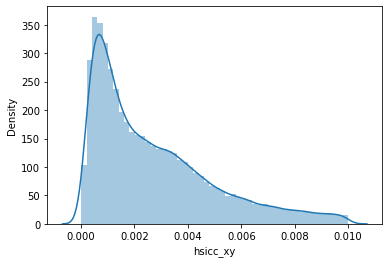

In [16]:
sns.distplot(df["hsicc_xy"].loc[df["hsicc_xy"]<0.01])

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

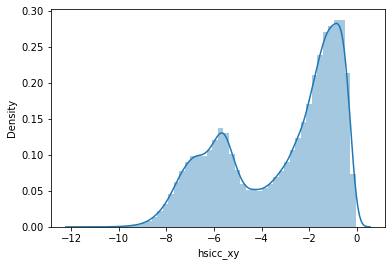

In [17]:
sns.distplot(onp.log(df["hsicc_xy"]))

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

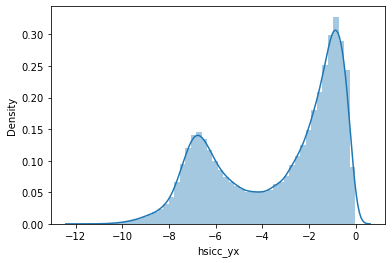

In [18]:
sns.distplot(onp.log(df["hsicc_yx"]))

In [19]:
df["negHsicc"] = (df["hsicc_xy"]<0)|(df["hsicc_yx"]<0)

In [20]:
parsVars= list(pars.keys())
def sumNegHsic(x):
    return onp.sum(x.negHsicc)/x.shape[0]

dfAux = df[parsVars+["rep","type","negHsicc"]].groupby(["rep","type"]+parsVars).apply(sumNegHsic)
dfAux = dfAux.reset_index()
dfAux

,rep,type,lambda,sig,eta,beta,neta,nu,lu,lr,ot,epchs,bs,reps,0
0,0,AN,0.001,0.5,0.1,0.1,0.1,1000.0,0.0,0.1,freeZ,500,100,7,0.0
1,0,AN,0.001,0.5,0.1,0.1,1.0,1000.0,0.0,0.1,freeZ,500,100,7,0.0
2,0,AN,0.001,0.5,0.1,0.1,10.0,1000.0,0.0,0.1,freeZ,500,100,7,0.0
3,0,AN,0.001,0.5,0.1,1.0,0.1,1000.0,0.0,0.1,freeZ,500,100,7,0.0
4,0,AN,0.001,0.5,0.1,1.0,1.0,1000.0,0.0,0.1,freeZ,500,100,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,6,tcep,1.000,0.5,0.1,10.0,1.0,1000.0,0.0,0.1,freeZ,500,100,7,0.0
3020,6,tcep,1.000,0.5,0.1,10.0,1.0,1000.0,0.0,0.1,freeZ,503,99,7,0.0
3021,6,tcep,1.000,0.5,0.1,10.0,10.0,1000.0,0.0,0.1,freeZ,500,90,7,0.0
3022,6,tcep,1.000,0.5,0.1,10.0,10.0,1000.0,0.0,0.1,freeZ,500,100,7,0.0


/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


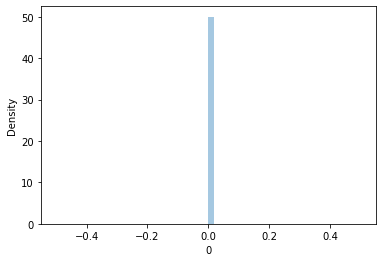

In [21]:
sns.distplot(dfAux[0])

## Infinite Entropy?

In [22]:
onp.min(df[["ent_xy","entx_xy","ent_yx","entx_yx"]]) #,"ent2_xy","ent2_yx"

ent_xy    -inf
entx_xy   -inf
ent_yx    -inf
entx_yx   -inf
dtype: float64

In [23]:
onp.min(onp.abs(df[["ent_xy","entx_xy","ent_yx","entx_yx"]])) #,"ent2_xy","ent2_yx"

ent_xy     0.903944
entx_xy    0.172599
ent_yx     0.865390
entx_yx    0.274736
dtype: float64

In [24]:
onp.sum((onp.isinf(df["ent_xy"]))|(onp.isinf(df["ent_yx"])))

77

In [25]:
onp.sum((onp.isinf(df["entx_xy"]))|(onp.isinf(df["entx_yx"])))

30562

In [26]:
#onp.sum((onp.isinf(df["ent2_xy"]))|(onp.isinf(df["ent2_yx"])))

In [27]:
df.shape

(252504, 37)

In [28]:
df["infEnt"] = (onp.isinf(df["ent_xy"])|onp.isinf(df["ent_yx"]))
#df["infEnt2"] = (onp.isinf(df["ent2_xy"])|onp.isinf(df["ent2_yx"]))
df["infEntx"] = (onp.isinf(df["entx_xy"])|onp.isinf(df["entx_yx"]))

In [29]:
parsVars= list(pars.keys())
def sumInfEnt(x):
    return onp.sum(x.infEnt)/x.shape[0]
def sumInfEnt2(x):
    return onp.sum(x.infEnt2)/x.shape[0]
def sumInfEntx(x):
    return onp.sum(x.infEntx)/x.shape[0]



In [30]:
dfAux = df[["type","infEnt"]].groupby(["type"]).apply(sumInfEnt)
dfAux = dfAux.reset_index()
dfAux

,type,0
0,AN,0.000000
1,AN-s,0.000000
2,LS,0.000000
3,LS-s,0.000000
4,MN-U,0.000000
5,SIM,0.000278
6,SIMG,0.000000
7,SIMc,0.000000
8,SIMln,0.000040
9,tcep,0.002684


In [31]:
#dfAux = df[["type","infEnt2"]].groupby(["type"]).apply(sumInfEnt2)
#dfAux = dfAux.reset_index()
#dfAux

In [32]:
onp.unique(df.loc[df["infEnt"]]["dataset"])

array(['10', '11', '12', '17', '26', '28', '29', '32', '5', '6', '69',
       '7', '9', '99', 'SIM.67', 'SIMln.61'], dtype=object)

In [33]:
dfAux = df[["type","infEntx"]].groupby(["type"]).apply(sumInfEntx)
dfAux = dfAux.reset_index()
dfAux

,type,0
0,AN,0.000000
1,AN-s,0.000000
2,LS,0.000000
3,LS-s,0.000000
4,MN-U,0.000000
5,SIM,0.040278
6,SIMG,0.000000
7,SIMc,0.030000
8,SIMln,0.280000
9,tcep,0.845588


# other investigatons

In [34]:
df.columns

Index(['errs_xy', 'hsic_xy', 'hsicc_xy', 'ent_xy', 'entx_xy', 'hsicx_xy',
       'hsicz_xy', 'hsiczz_xy', 'mmd_xy', 'errs_yx', 'hsic_yx', 'hsicc_yx',
       'ent_yx', 'entx_yx', 'hsicx_yx', 'hsicz_yx', 'hsiczz_yx', 'mmd_yx',
       'job', 'rep', 'lambda', 'sig', 'eta', 'beta', 'neta', 'nu', 'lu', 'lr',
       'ot', 'epchs', 'bs', 'reps', 'type', 'dataset', 'set', 'num',
       'negHsicc', 'infEnt', 'infEntx'],
      dtype='object')

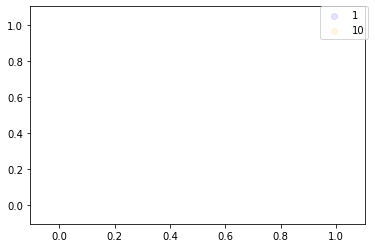

In [35]:
df_plt = df.loc[df["type"]=="tcep"]
plt.scatter(df_plt.loc[df_plt["eta"]==1.0]["hsicc_xy"], df_plt.loc[df_plt["eta"]==1.0]["hsic_xy"], c="blue", alpha=0.1, label=1)
plt.scatter(df_plt.loc[df_plt["eta"]==10.0]["hsicc_xy"], df_plt.loc[df_plt["eta"]==10.0]["hsic_xy"], c="orange", alpha=0.1, label=10)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/emiliano/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/emiliano/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

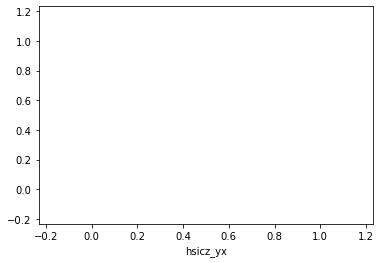

In [36]:
sns.distplot(df_plt.loc[df_plt["eta"]==1.0]["hsicz_xy"])
sns.distplot(df_plt.loc[df_plt["eta"]==1.0]["hsicz_yx"])

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/emiliano/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/emiliano/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

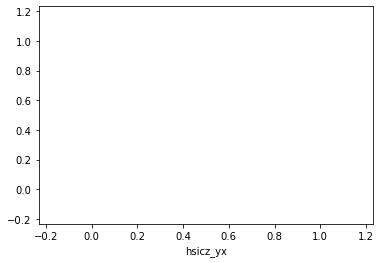

In [37]:
sns.distplot(df_plt.loc[df_plt["eta"]==10.0]["hsicz_xy"])
sns.distplot(df_plt.loc[df_plt["eta"]==10.0]["hsicz_yx"])

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/emiliano/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/emiliano/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated functio

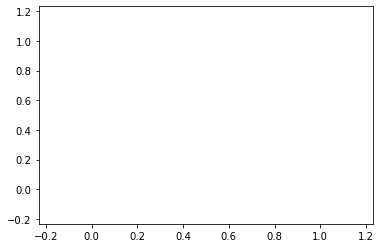

In [38]:
sns.distplot(onp.abs(df_plt.loc[df_plt["eta"]==1.0]["hsicz_xy"]-df_plt.loc[df_plt["eta"]==1.0]["hsicz_yx"]))
sns.distplot(onp.abs(df_plt.loc[df_plt["eta"]==10.0]["hsicz_xy"]-df_plt.loc[df_plt["eta"]==10.0]["hsicz_yx"]))

/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


0.0023573869839310646

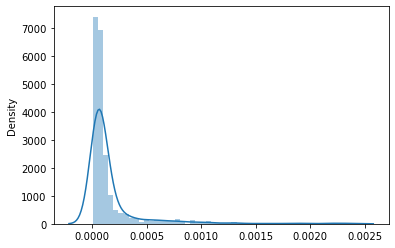

In [39]:
def minHsicc(x):
    return onp.min([x.hsicc_yx, x.hsicc_xy])
sns.distplot(df[["type","dataset","hsicc_xy","hsicc_yx"]].groupby("dataset").apply(minHsicc))
onp.max(df[["type","dataset","hsicc_xy","hsicc_yx"]].groupby("dataset").apply(minHsicc))

In [40]:
df["bigHsicc"]=(df["hsicc_xy"]>0.01) | (df["hsicc_yx"]>0.01) 
#df["lowConv"]=onp.abs(df["hsicz_xy"]-df["hsicz_yx"])<0.01 
df["lowConv"]=(df["hsicz_xy"]<0.2) | (df["hsicz_yx"]<0.2) 


In [41]:
def pctBigHsicc(x):
    return onp.sum(x.bigHsicc)/x.shape[0]
onp.max(df[["type","dataset","bigHsicc"]].groupby("dataset").apply(pctBigHsicc))

1.0

In [42]:
def pctLowConv(x):
    return onp.sum(x.lowConv)/x.shape[0]
print(onp.max(df[["type","dataset","lowConv"]].groupby("dataset").apply(pctLowConv)))
print(onp.mean(df[["type","dataset","lowConv"]].groupby("dataset").apply(pctLowConv)))

0.3888888888888889
0.17944666223109426


In [43]:
df[["type","dataset","lowConv","eta"]].groupby(["type","eta"]).apply(pctLowConv)

type   eta
AN     0.1    0.212222
AN-s   0.1    0.173056
LS     0.1    0.215000
LS-s   0.1    0.137500
MN-U   0.1    0.184722
SIM    0.1    0.154167
SIMG   0.1    0.168333
SIMc   0.1    0.172500
SIMln  0.1    0.131389
tcep   0.1    0.244281
dtype: float64

In [44]:
df3 = df
df3.shape

(252504, 41)

In [45]:
df = df3
df.shape

(252504, 41)

In [ ]:
df = df.loc[onp.logical_not(df["bigHsicc"])]
df.shape

In [ ]:
df = df.loc[onp.logical_not(df["lowConv"])]


In [ ]:
df.shape

#  Pair up

Pair up 

1. by param: as is - df- DONE
2. intersection -  df_intsc - DONE
3. NNs - df_nn - DONE
4. Random - df_rnd - DONE



## pair-up: by-param/as-is

In [12]:
# as-is

In [13]:
ds = "5"
st = "LS-s"

In [14]:
df.head()

,errs_xy,hsic_xy,hsicc_xy,ent_xy,entx_xy,hsicx_xy,hsicz_xy,hsiczz_xy,mmd_xy,errs_yx,...,lu,lr,ot,epchs,bs,reps,type,dataset,set,num
0,0.027083,0.024381,0.780127,-4.564907,-2.718646,0.030328,0.681622,0.063623,0.681622,0.038944,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000
1,0.024802,0.030332,0.484400,-4.624232,-2.762605,0.030340,0.681622,0.061254,0.681622,0.036211,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000
2,0.029882,0.031268,0.728674,-4.589707,-2.718121,0.031429,0.681622,0.055748,0.681622,0.036343,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000
3,0.033075,0.020490,0.605939,-4.330315,-2.593412,0.063710,0.681622,0.051780,0.681622,0.028272,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000
4,0.054311,0.045628,0.289183,-3.795319,-2.212888,0.196346,0.681622,0.042396,0.681622,0.039553,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000


In [15]:
hsic_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicx_xy"])
hsic_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicx_yx"])
hsic = onp.hstack([hsic_xy, hsic_yx])
hsicc_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicc_xy"])
hsicc_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicc_yx"])
hsicc = onp.hstack([hsicc_xy, hsicc_yx])

#hsic_yx= hsic_yx[0:(hsic_yx.shape[0]-1)]
#hsicc_yx= hsicc_yx[0:(hsicc_yx.shape[0]-1)]
print(hsic_xy.shape)
print(hsic_yx.shape)

(252,)
(252,)


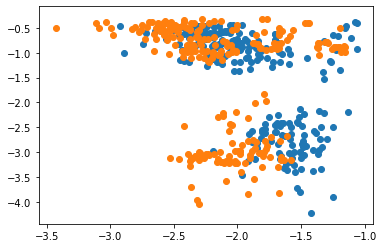

In [16]:
plt.scatter(onp.log10(hsic_xy), onp.log10(hsicc_xy))
plt.scatter(onp.log10(hsic_yx), onp.log10(hsicc_yx))

In [17]:
df_xy = pd.DataFrame(onp.vstack([onp.log10(hsic_xy), onp.log10(hsicc_xy)]).T, columns=["hsicx", "hsicc"])
df_xy["dir"] = "xy"
df_yx = pd.DataFrame(onp.vstack([onp.log10(hsic_yx), onp.log10(hsicc_yx)]).T, columns=["hsicx", "hsicc"])
df_yx["dir"] = "yx"

df_plt = pd.concat([df_xy, df_yx])
df_plt

,hsicx,hsicc,dir
0,-2.239587,-0.453558,xy
1,-2.184362,-0.686239,xy
2,-2.451799,-0.473232,xy
3,-2.117083,-0.573076,xy
4,-2.140675,-0.923054,xy
...,...,...,...
247,-1.733765,-2.692932,yx
248,-2.017574,-3.223229,yx
249,-2.318862,-3.956831,yx
250,-1.901588,-3.052793,yx


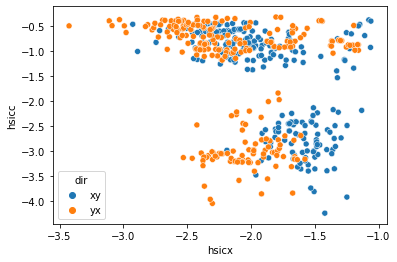

In [18]:
sns.scatterplot(data=df_plt, x="hsicx", y="hsicc", hue="dir")

In [19]:
#sns.kdeplot(data=df_plt, x="hsic", y="hsicc", hue="dir")
#sns.jointplot(data=df_plt, x="hsic", y="hsicc",kind="hex")

In [20]:
#sns.jointplot(data=df_plt, x="hsic", y="hsicc", hue="dir",kind="kde")

In [21]:
m = 1
varss = ['errs',"hsic",'hsicc','ent','hsicz','hsiczz','mmd'] #'slopes','slopeskrr',
varss = ['errs','hsicx',"hsic",'hsicc','ent','entx','hsicz','hsiczz','mmd']
varss = ['errs','hsicx',"hsic",'hsicc','ent','ent2','entx','hsicz','hsiczz','mmd'] #'slopes','slopeskrr',
varss = ['errs','hsicx',"hsic",'hsicc','ent','entx','hsicz','hsiczz','mmd'] 

In [22]:
df_parm = df.groupby(['type',"dataset"]).apply(pairup,varss=varss, funct=smplParm, getParsFunct=getParsParm, pars=(m,))

In [23]:
df_parm = df_parm.reset_index()
df_parm.head()

,type,dataset,level_2,errs_xy,hsicx_xy,hsic_xy,hsicc_xy,ent_xy,entx_xy,hsicz_xy,...,mmd_xy,errs_yx,hsicx_yx,hsic_yx,hsicc_yx,ent_yx,entx_yx,hsicz_yx,hsiczz_yx,mmd_yx
0,LS-s,LS-s.1,0,0.027083,0.030328,0.024381,0.780127,-4.564907,-2.718646,0.681622,...,0.681622,0.038944,0.005777,0.009578,0.668687,-4.135749,-2.470584,0.612241,0.006965,0.612241
1,LS-s,LS-s.1,1,0.024802,0.030340,0.030332,0.484400,-4.624232,-2.762605,0.681622,...,0.681622,0.036211,0.001403,0.002559,0.674663,-4.219990,-2.491660,0.612241,0.008296,0.612241
2,LS-s,LS-s.1,2,0.029882,0.031429,0.031268,0.728674,-4.589707,-2.718121,0.681622,...,0.681622,0.036343,0.019637,0.022145,0.606337,-4.054488,-2.465894,0.612241,0.003347,0.612241
3,LS-s,LS-s.1,3,0.033075,0.063710,0.020490,0.605939,-4.330315,-2.593412,0.681622,...,0.681622,0.028272,0.010354,0.010393,0.414035,-4.365828,-2.706191,0.612241,0.007228,0.612241
4,LS-s,LS-s.1,4,0.054311,0.196346,0.045628,0.289183,-3.795319,-2.212888,0.681622,...,0.681622,0.039553,0.001305,0.001460,0.617980,-4.029513,-2.396863,0.612241,0.006399,0.612241


In [24]:
df_parm = df_parm.rename(columns={"level_2": "smpl"})

In [25]:
df.shape
df_parm.shape

(25200, 21)

## pair-up: random

In [26]:
# random

In [27]:
ds = "5"
st = "LS-s"

In [28]:
hsic_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicx_xy"])
hsic_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicx_yx"])
hsic = onp.hstack([hsic_xy, hsic_yx])
hsicc_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicc_xy"])
hsicc_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicc_yx"])
hsicc = onp.hstack([hsicc_xy, hsicc_yx])

#hsic_yx= hsic_yx[0:(hsic_yx.shape[0]-1)]
#hsicc_yx= hsicc_yx[0:(hsicc_yx.shape[0]-1)]
print(hsic_xy.shape)
print(hsic_yx.shape)

(252,)
(252,)


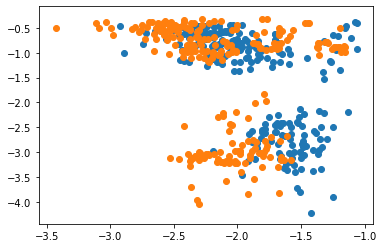

In [29]:
plt.scatter(onp.log10(hsic_xy), onp.log10(hsicc_xy))
plt.scatter(onp.log10(hsic_yx), onp.log10(hsicc_yx))

In [30]:
n = hsic_xy.shape[0]
m = 1000
indxSmpl_xy, indxSmpl_yx = smplRand(n, m)


In [31]:
hsic_xy3 = hsic_xy[indxSmpl_xy]
hsicc_xy3 = hsicc_xy[indxSmpl_xy]
hsic_yx3 = hsic_yx[indxSmpl_yx]
hsicc_yx3 = hsicc_yx[indxSmpl_yx]

In [32]:
df_xy = pd.DataFrame(onp.vstack([onp.log10(hsic_xy3), onp.log10(hsicc_xy3)]).T, columns=["hsicx", "hsicc"])
df_xy["dir"] = "xy"
df_yx = pd.DataFrame(onp.vstack([onp.log10(hsic_yx3), onp.log10(hsicc_yx3)]).T, columns=["hsicx", "hsicc"])
df_yx["dir"] = "yx"

df_plt = pd.concat([df_xy, df_yx])
df_plt

,hsicx,hsicc,dir
0,-2.239587,-0.453558,xy
1,-2.184362,-0.686239,xy
2,-2.451799,-0.473232,xy
3,-2.117083,-0.573076,xy
4,-2.140675,-0.923054,xy
...,...,...,...
1247,-2.761716,-0.537842,yx
1248,-2.992216,-0.499741,yx
1249,-2.302345,-4.038520,yx
1250,-2.105189,-3.214649,yx


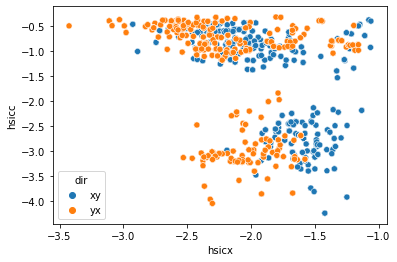

In [33]:
sns.scatterplot(data=df_plt, x="hsicx", y="hsicc", hue="dir")

In [34]:
#sns.kdeplot(data=df_plt, x="hsicx", y="hsicc", hue="dir")
#sns.jointplot(data=df_plt, x="hsicx", y="hsicc",kind="hex")

In [35]:
#sns.jointplot(data=df_plt, x="hsicx", y="hsicc", hue="dir",kind="kde")

In [36]:
df

,errs_xy,hsic_xy,hsicc_xy,ent_xy,entx_xy,hsicx_xy,hsicz_xy,hsiczz_xy,mmd_xy,errs_yx,...,lu,lr,ot,epchs,bs,reps,type,dataset,set,num
0,0.027083,0.024381,0.780127,-4.564907,-2.718646,0.030328,0.681622,0.063623,0.681622,0.038944,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000
1,0.024802,0.030332,0.484400,-4.624232,-2.762605,0.030340,0.681622,0.061254,0.681622,0.036211,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000
2,0.029882,0.031268,0.728674,-4.589707,-2.718121,0.031429,0.681622,0.055748,0.681622,0.036343,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000
3,0.033075,0.020490,0.605939,-4.330315,-2.593412,0.063710,0.681622,0.051780,0.681622,0.028272,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000
4,0.054311,0.045628,0.289183,-3.795319,-2.212888,0.196346,0.681622,0.042396,0.681622,0.039553,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.084565,0.014885,0.000172,-2.458002,-1.629917,0.013601,0.283446,0.323871,0.283446,0.036147,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.100,ANLSMN_withZ,1000
3,0.074890,0.009999,0.004105,-2.618244,-1.765126,0.009182,0.283446,0.447061,0.283446,0.060507,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.100,ANLSMN_withZ,1000
4,0.090577,0.014708,0.003175,-2.457047,-1.568637,0.015383,0.283446,0.375642,0.283446,0.095322,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.100,ANLSMN_withZ,1000
5,0.058012,0.008962,0.003926,-2.865269,-1.949303,0.011444,0.283446,0.552042,0.283446,0.060050,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.100,ANLSMN_withZ,1000


In [37]:
varss = ['errs',"hsic",'hsicc','ent','hsicz','hsiczz','mmd'] #'slopes','slopeskrr',
varss = ['errs','hsicx',"hsic",'hsicc','ent','entx','hsicz','hsiczz','mmd']
varss = ['errs','hsicx',"hsic",'hsicc','ent','ent2','entx','hsicz','hsiczz','mmd'] #'slopes','slopeskrr',
varss = ['errs','hsicx',"hsic",'hsicc','ent','entx','hsicz','hsiczz','mmd'] 

In [38]:
m = 100

In [39]:
df_rand = df.groupby(['type',"dataset"]).apply(pairup,varss=varss, funct=smplRand, getParsFunct=getParsRand, pars=(m,))

In [40]:
df_rand = df_rand.reset_index()
df_rand.head()

,type,dataset,level_2,errs_xy,hsicx_xy,hsic_xy,hsicc_xy,ent_xy,entx_xy,hsicz_xy,...,mmd_xy,errs_yx,hsicx_yx,hsic_yx,hsicc_yx,ent_yx,entx_yx,hsicz_yx,hsiczz_yx,mmd_yx
0,LS-s,LS-s.1,0,0.027083,0.030328,0.024381,0.780127,-4.564907,-2.718646,0.681622,...,0.681622,0.038944,0.005777,0.009578,0.668687,-4.135749,-2.470584,0.612241,0.006965,0.612241
1,LS-s,LS-s.1,1,0.024802,0.030340,0.030332,0.484400,-4.624232,-2.762605,0.681622,...,0.681622,0.036211,0.001403,0.002559,0.674663,-4.219990,-2.491660,0.612241,0.008296,0.612241
2,LS-s,LS-s.1,2,0.029882,0.031429,0.031268,0.728674,-4.589707,-2.718121,0.681622,...,0.681622,0.036343,0.019637,0.022145,0.606337,-4.054488,-2.465894,0.612241,0.003347,0.612241
3,LS-s,LS-s.1,3,0.033075,0.063710,0.020490,0.605939,-4.330315,-2.593412,0.681622,...,0.681622,0.028272,0.010354,0.010393,0.414035,-4.365828,-2.706191,0.612241,0.007228,0.612241
4,LS-s,LS-s.1,4,0.054311,0.196346,0.045628,0.289183,-3.795319,-2.212888,0.681622,...,0.681622,0.039553,0.001305,0.001460,0.617980,-4.029513,-2.396863,0.612241,0.006399,0.612241


In [41]:
df_rand = df_rand.rename(columns={"level_2": "smpl"})

In [42]:
df_rand_long_full = getLongFormat2(df_rand, ["type","dataset","smpl"])

In [43]:
print(df_rand.shape)

(35200, 21)


## pair-up: Intersection

In [44]:
# intersection

In [45]:
ds = "2"
st = "LS-s"

In [46]:
hsic_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicx_xy"])
hsic_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicx_yx"])
hsic = onp.hstack([hsic_xy, hsic_yx])
hsicc_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicc_xy"])
hsicc_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicc_yx"])
hsicc = onp.hstack([hsicc_xy, hsicc_yx])

#hsic_yx= hsic_yx[0:(hsic_yx.shape[0]-1)]
#hsicc_yx= hsicc_yx[0:(hsicc_yx.shape[0]-1)]
print(hsic_xy.shape)
print(hsic_yx.shape)

(252,)
(252,)


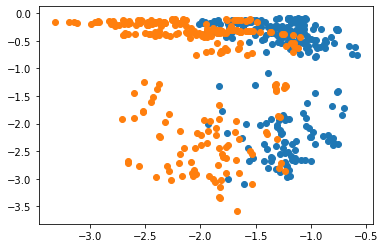

In [47]:
plt.scatter(onp.log10(hsic_xy), onp.log10(hsicc_xy))
plt.scatter(onp.log10(hsic_yx), onp.log10(hsicc_yx))

In [48]:
varss = ['errs','hsic','hsicc','ent','hsicz','hsiczz','mmd'] #'slopes','slopeskrr',
varss = ['errs','hsicx','hsic','hsicc','ent','entx','hsicz','hsiczz','mmd']
varss = ['errs','hsicx','hsic','hsicc','ent','ent2','entx','hsicz','hsiczz','mmd'] #'slopes','slopeskrr',
varss = ['errs','hsicx','hsic','hsicc','ent','entx','hsicz','hsiczz','mmd'] 

In [49]:
sig = 100.0
m = 10000

In [50]:
x = df.loc[(df["dataset"]==st+"."+ds)]
x.head()

,errs_xy,hsic_xy,hsicc_xy,ent_xy,entx_xy,hsicx_xy,hsicz_xy,hsiczz_xy,mmd_xy,errs_yx,...,lu,lr,ot,epchs,bs,reps,type,dataset,set,num
0,0.029607,0.014793,0.763004,-4.449333,-2.779527,0.019311,0.644735,0.081334,0.644735,0.034350,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.2,ANLSMN_withZ,1000
1,0.027627,0.019408,0.461555,-4.570171,-2.812070,0.019404,0.644735,0.082746,0.644735,0.036480,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.2,ANLSMN_withZ,1000
2,0.029590,0.020149,0.702200,-4.569937,-2.812555,0.020148,0.644735,0.081805,0.644735,0.033090,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.2,ANLSMN_withZ,1000
3,0.037388,0.016091,0.572924,-4.078753,-2.529092,0.049200,0.644735,0.069191,0.644735,0.028872,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.2,ANLSMN_withZ,1000
4,0.047716,0.035490,0.285165,-3.794912,-2.310963,0.163549,0.644735,0.053070,0.644735,0.038181,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.2,ANLSMN_withZ,1000


In [51]:
varsss = ["hsic", "hsicc","errs"]
varsss = ["hsicx", "hsicc","errs"]

In [52]:
X_xy, X_yx, sig, m = getParsIntersection(x, varsss, sig, m)

In [53]:
X_xy

array([[-1.714, -0.117, -1.529],
       [-1.712, -0.336, -1.559],
       [-1.696, -0.154, -1.529],
       [-1.308, -0.242, -1.427],
       [-0.786, -0.545, -1.321],
       [-0.813, -0.431, -1.298],
       [-1.672, -0.122, -1.519],
       [-1.56 , -0.136, -1.559],
       [-1.747, -0.36 , -1.565],
       [-1.672, -0.173, -1.532],
       [-1.366, -0.276, -1.465],
       [-0.912, -0.618, -1.311],
       [-0.884, -0.556, -1.326],
       [-1.718, -0.141, -1.534],
       [-1.275, -2.554, -1.473],
       [-1.587, -2.011, -1.588],
       [-1.571, -2.45 , -1.564],
       [-1.092, -2.669, -1.303],
       [-0.976, -2.15 , -1.213],
       [-0.75 , -2.379, -1.303],
       [-1.237, -2.532, -1.473],
       [-1.682, -0.146, -1.592],
       [-1.844, -0.359, -1.617],
       [-1.867, -0.177, -1.597],
       [-1.28 , -0.253, -1.51 ],
       [-0.964, -0.58 , -1.352],
       [-0.873, -0.489, -1.318],
       [-1.757, -0.143, -1.596],
       [-1.701, -0.169, -1.59 ],
       [-1.943, -0.387, -1.626],
       [-1

In [54]:
indxSmpl_row, indxSmpl_col = smplFromIntersection(X_xy, X_yx, sig, m)

In [55]:
hsic_xy3 = hsic_xy[indxSmpl_row]
hsicc_xy3 = hsicc_xy[indxSmpl_row]
hsic_yx3 = hsic_yx[indxSmpl_col]
hsicc_yx3 = hsicc_yx[indxSmpl_col]

In [56]:
df_xy = pd.DataFrame(onp.vstack([onp.log10(hsic_xy3), onp.log10(hsicc_xy3)]).T, columns=["hsicx", "hsicc"])
df_xy["dir"] = "xy"
df_yx = pd.DataFrame(onp.vstack([onp.log10(hsic_yx3), onp.log10(hsicc_yx3)]).T, columns=["hsicx", "hsicc"])
df_yx["dir"] = "yx"

df_plt = pd.concat([df_xy, df_yx])
print(df_plt.shape)
df_plt

(20000, 3)


,hsicx,hsicc,dir
0,-1.338637,-0.280607,xy
1,-1.752588,-0.196667,xy
2,-1.237258,-2.532105,xy
3,-1.273448,-0.265383,xy
4,-1.868643,-0.347647,xy
...,...,...,...
9995,-2.042602,-0.391859,yx
9996,-1.245258,-0.372283,yx
9997,-1.694893,-0.126388,yx
9998,-1.838637,-0.341286,yx


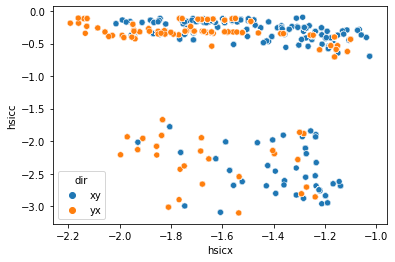

In [57]:
sns.scatterplot(data=df_plt, x="hsicx", y="hsicc", hue="dir")

In [58]:
#sns.kdeplot(data=df_plt, x="hsicx", y="hsicc", hue="dir")
#sns.jointplot(data=df_plt, x="hsicx", y="hsicc",kind="hex")

In [59]:
#sns.jointplot(data=df_plt, x="hsicx", y="hsicc", hue="dir",kind="kde")

In [60]:
m = 100
sig = 10.0

In [61]:
def mywhere(x):
    res, = onp.where(x)
    if res.shape[0] == 0:
        res = -1
    return res

In [62]:
indx = mywhere(onp.apply_along_axis(onp.any, 1, onp.isnan(onp.log10(df[["errs_xy","errs_yx", "hsicx_xy","hsicx_yx","hsicc_xy","hsicc_yx"]]))))
len(indx)

TypeError: object of type 'int' has no len()

In [63]:
indx2 = mywhere(onp.apply_along_axis(onp.any, 1, onp.isnan(df[["errs_xy","errs_yx", "hsicx_xy","hsicx_yx","hsicc_xy","hsicc_yx"]])))
len(indx2)

TypeError: object of type 'int' has no len()

In [64]:
df.shape

(25200, 36)

In [65]:
df[["errs_xy","errs_yx","hsicx_xy","hsicx_yx","hsicc_xy","hsicc_yx"]].iloc[indx2]

errs_xy     0.056588
errs_yx     0.081581
hsicx_xy    0.014336
hsicx_yx    0.024658
hsicc_xy    0.000311
hsicc_yx    0.000480
Name: 6, dtype: float64

In [66]:
onp.log10(df[["errs_xy","errs_yx","hsicx_xy","hsicx_yx","hsicc_xy","hsicc_yx"]]).iloc[indx2]

errs_xy    -1.247274
errs_yx    -1.088409
hsicx_xy   -1.843571
hsicx_yx   -1.608039
hsicc_xy   -3.506671
hsicc_yx   -3.318906
Name: 6, dtype: float64

In [67]:
if indx2[0]!=-1:
    if indx2.shape[0] > 0:
        print("drop")
        df = df.reset_index()
        df.drop(index=indx2, inplace=True)

TypeError: 'int' object is not subscriptable

In [68]:
if indx[0]!=-1:
    if indx.shape[0] > 0:
        print("absolute")
        #df[["errs_xy","errs_yx","hsicx_xy","hsicx_yx","hsicc_xy","hsicc_yx"]] = onp.abs(df[["errs_xy","errs_yx","hsicx_xy","hsicx_yx","hsicc_xy","hsicc_yx"]])
        df["hsicc_xy"].loc[df["hsicc_xy"]<0] = onp.min(onp.abs(df["hsicc_xy"]))
        df["hsicc_yx"].loc[df["hsicc_yx"]<0] = onp.min(onp.abs(df["hsicc_yx"]))

TypeError: 'int' object is not subscriptable

In [69]:
df_intsc = df.groupby(['type',"dataset"]).apply(pairup,varss=varss, funct=smplFromIntersection, getParsFunct=getParsIntersection, pars=(varsss,sig,m))

In [70]:
df_intsc = df_intsc.reset_index()
df_intsc.head()

,type,dataset,level_2,errs_xy,hsicx_xy,hsic_xy,hsicc_xy,ent_xy,entx_xy,hsicz_xy,...,mmd_xy,errs_yx,hsicx_yx,hsic_yx,hsicc_yx,ent_yx,entx_yx,hsicz_yx,hsiczz_yx,mmd_yx
0,LS-s,LS-s.1,0,0.026763,0.039134,0.032357,0.781773,-4.669610,-2.756219,0.765690,...,0.765690,0.035235,0.022908,0.023965,0.458470,-4.632234,-2.619437,0.909477,0.001928,0.909477
1,LS-s,LS-s.1,1,0.022122,0.020918,0.016524,0.703943,-4.558956,-2.903427,0.702010,...,0.702010,0.046628,0.017672,0.017826,0.440862,-4.274912,-2.311724,0.932110,0.001247,0.932110
2,LS-s,LS-s.1,2,0.029407,0.047026,0.036093,0.784870,-4.465516,-2.652951,0.681622,...,0.681622,0.020868,0.036128,0.050541,0.521382,-4.677516,-3.141747,0.914750,0.043480,0.914750
3,LS-s,LS-s.1,3,0.020734,0.018178,0.018176,0.434510,-4.769974,-2.984786,0.624656,...,0.624656,0.010975,0.010171,0.015567,0.461619,-5.397553,-4.043555,0.832437,0.047874,0.832437
4,LS-s,LS-s.1,4,0.022065,0.043188,0.035371,0.719620,-4.701890,-2.887221,0.734734,...,0.734734,0.014001,0.045326,0.045662,0.272815,-5.127568,-3.900652,0.805945,0.076389,0.805945


In [71]:
df_intsc = df_intsc.rename(columns={"level_2": "smpl"})

In [72]:
df_intsc.shape

(10000, 21)

## pair-up: nearest neigbors

In [47]:
ds = "3"
st = "LS-s"

In [48]:
hsic_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicx_xy"])
hsic_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicx_yx"])
hsicc_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicc_xy"])
hsicc_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicc_yx"])


#hsic_yx= hsic_yx[0:(hsic_yx.shape[0]-1)]
#hsicc_yx= hsicc_yx[0:(hsicc_yx.shape[0]-1)]
print(hsic_xy.shape)
print(hsic_yx.shape)


    

(252,)
(252,)


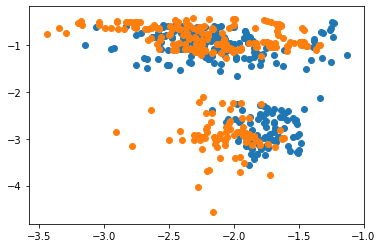

In [49]:
plt.scatter(onp.log10(hsic_xy), onp.log10(hsicc_xy))
plt.scatter(onp.log10(hsic_yx), onp.log10(hsicc_yx))

In [50]:
varss = ['errs','hsic','hsicc','ent','hsicz','hsiczz','mmd']#'slopes','slopeskrr',
varss = ['errs','hsicx','hsic','hsicc','ent','entx','hsicz','hsiczz','mmd']
varss = ['errs','hsicx','hsic','hsicc','ent','ent2','entx','hsicz','hsiczz','mmd']#'slopes','slopeskrr',
varss = ['errs','hsicx','hsic','hsicc','ent','entx','hsicz','hsiczz','mmd']#'slopes','slopeskrr',
numPts = 2

In [51]:
x = df.loc[(df["dataset"]==st+"."+ds)]
x.head()

,errs_xy,hsic_xy,hsicc_xy,ent_xy,entx_xy,hsicx_xy,hsicz_xy,hsiczz_xy,mmd_xy,errs_yx,...,lu,lr,ot,epchs,bs,reps,type,dataset,set,num
0,0.048330,0.006241,0.264612,-3.263900,-2.147239,0.006992,0.502069,0.407350,0.502069,0.043229,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.3,ANLSMN_withZ,1000
1,0.045368,0.004970,0.175971,-3.321931,-2.183321,0.004937,0.502069,0.430788,0.502069,0.045363,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.3,ANLSMN_withZ,1000
2,0.053448,0.001658,0.255042,-3.098125,-1.984829,0.001475,0.502069,0.386283,0.502069,0.039503,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.3,ANLSMN_withZ,1000
3,0.054447,0.004532,0.183111,-3.095244,-2.021520,0.001918,0.502069,0.393564,0.502069,0.038000,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.3,ANLSMN_withZ,1000
4,0.065070,0.004478,0.078594,-2.895475,-1.846101,0.008357,0.502069,0.322510,0.502069,0.053047,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.3,ANLSMN_withZ,1000


In [52]:
#varsss = ["hsicx", "ent","errs"]
varsss = ["hsic", "hsicc","errs"]
varsss = ["hsicx", "hsicc","errs"]

In [53]:
X_xy, X_yx, numPts = getParsNN(x, varsss, numPts)

In [54]:
indx_xy2, indx_yx2 = nearestNeighbors(X_xy, X_yx, numPts)

In [55]:
hsic_xy3 = hsic_xy[indx_xy2]
hsicc_xy3 = hsicc_xy[indx_xy2]
hsic_yx3 = hsic_yx[indx_yx2]
hsicc_yx3 = hsicc_yx[indx_yx2]

hsic3 = onp.hstack([hsic_xy3, hsic_yx3])
hsicc3 = onp.hstack([hsicc_xy3, hsicc_yx3])

In [56]:
df_xy = pd.DataFrame(onp.vstack([onp.log10(hsic_xy3), onp.log10(hsicc_xy3)]).T, columns=["hsicx", "hsicc"])
df_xy["dir"] = "xy"
df_yx = pd.DataFrame(onp.vstack([onp.log10(hsic_yx3), onp.log10(hsicc_yx3)]).T, columns=["hsicx", "hsicc"])
df_yx["dir"] = "yx"

df_plt = pd.concat([df_xy, df_yx])
df_plt

,hsicx,hsicc,dir
0,-2.155395,-0.577390,xy
1,-2.155395,-0.577390,xy
2,-2.306515,-0.754558,xy
3,-2.306515,-0.754558,xy
4,-2.831275,-0.593389,xy
...,...,...,...
1003,-2.413818,-2.843206,yx
1004,-1.844694,-2.931306,yx
1005,-1.844694,-2.931306,yx
1006,-1.611909,-2.986618,yx


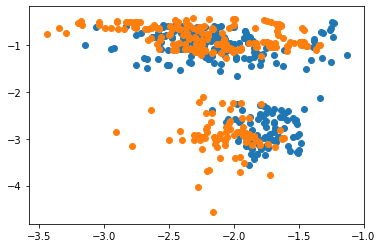

In [57]:
plt.scatter(onp.log10(hsic_xy), onp.log10(hsicc_xy))
plt.scatter(onp.log10(hsic_yx), onp.log10(hsicc_yx))

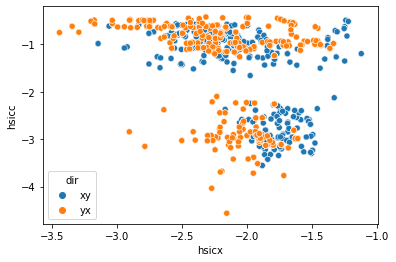

In [58]:
sns.scatterplot(data=df_plt, x="hsicx", y="hsicc", hue="dir")

In [59]:
#sns.kdeplot(data=df_plt, x="hsicx", y="hsicc", hue="dir")
#sns.jointplot(data=df_plt, x="hsicx", y="hsicc",kind="hex")

In [60]:
#sns.jointplot(data=df_plt, x="hsicx", y="hsicc", hue="dir",kind="kde")

In [61]:
numPts=20

In [62]:
df_nn = df.groupby(['type',"dataset"]).apply(pairup,varss=varss, funct=nearestNeighbors, getParsFunct=getParsNN, pars=(varsss,numPts,))

In [63]:
df_nn = df_nn.reset_index()
df_nn.head()

,type,dataset,level_2,errs_xy,hsicx_xy,hsic_xy,hsicc_xy,ent_xy,entx_xy,hsicz_xy,...,mmd_xy,errs_yx,hsicx_yx,hsic_yx,hsicc_yx,ent_yx,entx_yx,hsicz_yx,hsiczz_yx,mmd_yx
0,LS,LS.1,0,0.047,0.002588,0.003411,0.265298,-3.102163,-1.992497,0.466334,...,0.466334,0.052316,0.002141,0.002272,0.241946,-3.098725,-2.015549,0.747508,0.005712,0.747508
1,LS,LS.1,1,0.047,0.002588,0.003411,0.265298,-3.102163,-1.992497,0.466334,...,0.466334,0.053455,0.002047,0.007050,0.257238,-3.091018,-2.029290,0.539815,0.006642,0.539815
2,LS,LS.1,2,0.047,0.002588,0.003411,0.265298,-3.102163,-1.992497,0.466334,...,0.466334,0.058051,0.002061,0.002075,0.210575,-2.930413,-1.913499,0.621169,0.008031,0.621169
3,LS,LS.1,3,0.047,0.002588,0.003411,0.265298,-3.102163,-1.992497,0.466334,...,0.466334,0.042472,0.003729,0.006402,0.296808,-3.469190,-2.236615,0.853472,0.009408,0.853472
4,LS,LS.1,4,0.047,0.002588,0.003411,0.265298,-3.102163,-1.992497,0.466334,...,0.466334,0.061113,0.001899,0.003870,0.262861,-2.946111,-1.873499,0.689232,0.005980,0.689232


In [64]:
print(df_nn.shape)

(3024000, 21)


In [65]:
df_nn = df_nn.rename(columns={"level_2": "smpl"})

In [66]:
#sns.distplot(onp.abs(df_nn["hsicz_xy"]-df_nn["hsicz_yx"]))

In [67]:
df_nn["lowConv"]=onp.abs(df_nn["hsicz_xy"]-df_nn["hsicz_yx"])<0.2

In [94]:
def lowConv(x):
    return onp.sum(x.lowConv)/x.shape[0]
tab = df_nn[["type","dataset","lowConv"]].groupby(["type","dataset"]).apply(lowConv)
tab = tab.reset_index()
tab

,type,dataset,0
0,LS-s,LS-s.1,0.821627
1,LS-s,LS-s.10,0.814484
2,LS-s,LS-s.100,0.784722
3,LS-s,LS-s.11,0.747421
4,LS-s,LS-s.12,0.780556
...,...,...,...
95,LS-s,LS-s.95,0.741865
96,LS-s,LS-s.96,0.772024
97,LS-s,LS-s.97,0.754167
98,LS-s,LS-s.98,0.808532


In [95]:
onp.max(tab[0])

0.8498015873015873

In [96]:

def mean0(x):
    return onp.mean(x[0])
tab.groupby(["type"]).apply(mean0)

type
LS-s    0.771964
dtype: float64

In [97]:
print(df_nn.shape)
#df_nn = df_nn.loc[onp.logical_not(df_nn["lowConv"])]
print(df_nn.shape)

(504000, 22)
(504000, 22)


# Filtering/ weighting pairs

Filter/weight
1. uniform - DONE
2. best hsic(r,c) - DONE
3. non-domminant efficient frontier - DONE
4. model simple- simple logistic regression model 
5. model complex -  "fair learning" where sensitive vars are model classes

## uniform: weighting

In [98]:
ds = "5"
st = "LS-s"

In [99]:
hsic_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicx_xy"])
hsic_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicx_yx"])
hsic = onp.hstack([hsic_xy, hsic_yx])
hsicc_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicc_xy"])
hsicc_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicc_yx"])
hsicc = onp.hstack([hsicc_xy, hsicc_yx])

#hsic_yx= hsic_yx[0:(hsic_yx.shape[0]-1)]
#hsicc_yx= hsicc_yx[0:(hsicc_yx.shape[0]-1)]
print(hsic_xy.shape)
print(hsic_yx.shape)

(252,)
(252,)


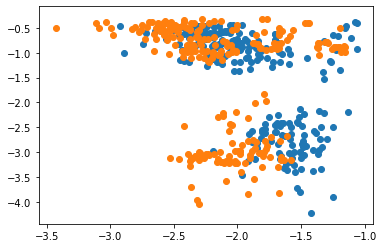

In [100]:
plt.scatter(onp.log10(hsic_xy), onp.log10(hsicc_xy))
plt.scatter(onp.log10(hsic_yx), onp.log10(hsicc_yx))

In [101]:
st+"."+ds

'LS-s.5'

In [102]:
x = df.loc[(df["dataset"]==st+"."+ds)]
x.head()

,errs_xy,hsic_xy,hsicc_xy,ent_xy,entx_xy,hsicx_xy,hsicz_xy,hsiczz_xy,mmd_xy,errs_yx,...,lu,lr,ot,epchs,bs,reps,type,dataset,set,num
0,0.049594,0.006244,0.351918,-3.280004,-2.073914,0.005760,0.504589,0.323300,0.504589,0.045704,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.5,ANLSMN_withZ,1000
1,0.047871,0.006551,0.205950,-3.305885,-2.079945,0.006541,0.504589,0.328589,0.504589,0.047541,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.5,ANLSMN_withZ,1000
2,0.054468,0.003624,0.336332,-3.152627,-1.955868,0.003533,0.504589,0.306425,0.504589,0.043246,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.5,ANLSMN_withZ,1000
3,0.055704,0.007139,0.267254,-3.100752,-1.966189,0.007637,0.504589,0.302648,0.504589,0.041452,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.5,ANLSMN_withZ,1000
4,0.067251,0.009602,0.119384,-2.863776,-1.760179,0.007233,0.504589,0.229064,0.504589,0.052309,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.5,ANLSMN_withZ,1000


In [103]:
x.shape

(252, 36)

In [104]:
n = getParsUnifW(x)
print(n)

(252,)


In [105]:
ws = unifo(n)

In [106]:
df.shape

(25200, 36)

In [107]:
df=df.reset_index()

In [108]:
df.groupby(['type',"dataset"]).apply(getWeights, nm="w_unif", funct=unifo, getParsFunct=getParsUnifW, pars=())

,index,errs_xy,hsic_xy,hsicc_xy,ent_xy,entx_xy,hsicx_xy,hsicz_xy,hsiczz_xy,mmd_xy,...,lr,ot,epchs,bs,reps,type,dataset,set,num,w_unif
0,0,0.027083,0.024381,0.780127,-4.564907,-2.718646,0.030328,0.681622,0.063623,0.681622,...,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000,0.003968
1,1,0.024802,0.030332,0.484400,-4.624232,-2.762605,0.030340,0.681622,0.061254,0.681622,...,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000,0.003968
2,2,0.029882,0.031268,0.728674,-4.589707,-2.718121,0.031429,0.681622,0.055748,0.681622,...,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000,0.003968
3,3,0.033075,0.020490,0.605939,-4.330315,-2.593412,0.063710,0.681622,0.051780,0.681622,...,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000,0.003968
4,4,0.054311,0.045628,0.289183,-3.795319,-2.212888,0.196346,0.681622,0.042396,0.681622,...,0.1,freeZ,500,100,7,LS-s,LS-s.1,ANLSMN_withZ,1000,0.003968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,2,0.084565,0.014885,0.000172,-2.458002,-1.629917,0.013601,0.283446,0.323871,0.283446,...,0.1,freeZ,500,100,7,LS-s,LS-s.100,ANLSMN_withZ,1000,0.003968
25196,3,0.074890,0.009999,0.004105,-2.618244,-1.765126,0.009182,0.283446,0.447061,0.283446,...,0.1,freeZ,500,100,7,LS-s,LS-s.100,ANLSMN_withZ,1000,0.003968
25197,4,0.090577,0.014708,0.003175,-2.457047,-1.568637,0.015383,0.283446,0.375642,0.283446,...,0.1,freeZ,500,100,7,LS-s,LS-s.100,ANLSMN_withZ,1000,0.003968
25198,5,0.058012,0.008962,0.003926,-2.865269,-1.949303,0.011444,0.283446,0.552042,0.283446,...,0.1,freeZ,500,100,7,LS-s,LS-s.100,ANLSMN_withZ,1000,0.003968


In [109]:
#df = df_rand

In [110]:
df["smpl"] = 1
df = getWeightsWrapper(df, getModMatVan, None, getModVan, None, "w_unif", unifo, getParsUnifW, [])
df_rand = getWeightsWrapper(df_rand, getModMatVan, None, getModVan, None, "w_unif", unifo, getParsUnifW, [])
df_intsc = getWeightsWrapper(df_intsc, getModMatVan, None, getModVan, None, "w_unif", unifo, getParsUnifW, [])
df_nn = getWeightsWrapper(df_nn, getModMatVan, None, getModVan, None, "w_unif", unifo, getParsUnifW, [])

get model matrix
model matrix time  8.282666667488077e-07  mins
get model
model fitting time  0.00015922714999992612  mins
measure time for one dataset
0.005204069000001255
estimate for all datasets
estimated time for model application: 0.008673448333335424  mins
estimated time  0.008673448333335424  mins
estimated time  0.00014455747222225706  hours
estimated time time  6.0232280092607104e-06  days
apply model to each datset


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[nm] = ws


actual time  0.00859018400000006  mins
get model matrix
model matrix time  1.4296166668259502e-06  mins
get model
model fitting time  0.0001816399000001449  mins
measure time for one dataset
0.005759784999995077
estimate for all datasets
estimated time for model application: 0.009599641666658462  mins
estimated time  0.009599641666658462  mins
estimated time  0.00015999402777764103  hours
estimated time time  6.666417824068376e-06  days
apply model to each datset
actual time  0.011337630383333418  mins
get model matrix
model matrix time  7.437833334715075e-07  mins
get model
model fitting time  0.00016880218333336454  mins
measure time for one dataset
0.0034316340000088985
estimate for all datasets
estimated time for model application: 0.0057193900000148306  mins
estimated time  0.0057193900000148306  mins
estimated time  9.532316666691384e-05  hours
estimated time time  3.97179861112141e-06  days
apply model to each datset
actual time  0.012125077066666752  mins
get model matrix
model

## best hsic(r,c) : weighting

In [68]:
ds = "2"
st = "LS-s"

In [69]:
hsic_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicx_xy"])
hsic_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicx_yx"])
hsic = onp.hstack([hsic_xy, hsic_yx])
hsicc_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicc_xy"])
hsicc_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicc_yx"])
hsicc = onp.hstack([hsicc_xy, hsicc_yx])

#hsic_yx= hsic_yx[0:(hsic_yx.shape[0]-1)]
#hsicc_yx= hsicc_yx[0:(hsicc_yx.shape[0]-1)]
print(hsic_xy.shape)
print(hsic_yx.shape)

(252,)
(252,)


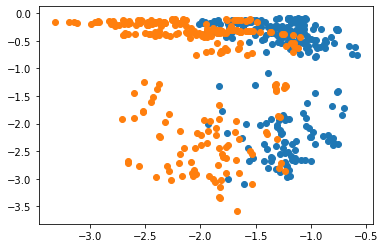

In [70]:
plt.scatter(onp.log10(hsic_xy), onp.log10(hsicc_xy))
plt.scatter(onp.log10(hsic_yx), onp.log10(hsicc_yx))

In [71]:
x = df.loc[(df["dataset"]==st+"."+ds)]
x.head()

,errs_xy,hsic_xy,hsicc_xy,ent_xy,entx_xy,hsicx_xy,hsicz_xy,hsiczz_xy,mmd_xy,errs_yx,...,lu,lr,ot,epchs,bs,reps,type,dataset,set,num
0,0.029607,0.014793,0.763004,-4.449333,-2.779527,0.019311,0.644735,0.081334,0.644735,0.034350,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.2,ANLSMN_withZ,1000
1,0.027627,0.019408,0.461555,-4.570171,-2.812070,0.019404,0.644735,0.082746,0.644735,0.036480,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.2,ANLSMN_withZ,1000
2,0.029590,0.020149,0.702200,-4.569937,-2.812555,0.020148,0.644735,0.081805,0.644735,0.033090,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.2,ANLSMN_withZ,1000
3,0.037388,0.016091,0.572924,-4.078753,-2.529092,0.049200,0.644735,0.069191,0.644735,0.028872,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.2,ANLSMN_withZ,1000
4,0.047716,0.035490,0.285165,-3.794912,-2.310963,0.163549,0.644735,0.053070,0.644735,0.038181,...,0.0,0.1,freeZ,500,100,7,LS-s,LS-s.2,ANLSMN_withZ,1000


In [72]:
sig = 5
var = "hsic"
var = "hsicx"


In [73]:
X_xy, X_yx, sig = getParsHsicW(x, var, sig)

In [74]:
ws = lowestHsic(X_xy, X_yx, sig)

In [77]:
df["smpl"] = 1
#df = getWeightsWrapper(df, getModMatVan, None, getModVan, None, "w_lowestHsic", lowestHsic, getParsHsicW, ["var","sig"], var=var, sig=sig)
#df_rand = getWeightsWrapper(df_rand, getModMatVan, None, getModVan, None, "w_lowestHsic", lowestHsic, getParsHsicW, ["var","sig"], var=var, sig=sig)
#df_intsc = getWeightsWrapper(df_intsc, getModMatVan, None, getModVan, None, "w_lowestHsic", lowestHsic, getParsHsicW, ["var","sig"], var=var, sig=sig)
df_nn = getWeightsWrapper(df_nn, getModMatVan, None, getModVan, None, "w_lowestHsic", lowestHsic, getParsHsicW, ["var","sig"], var=var, sig=sig)

get model matrix
model matrix time  1.6760000107751693e-07  mins
get model
model fitting time  8.7556850000207e-05  mins
measure time for one dataset
0.16858618800006298
estimate for all datasets
estimated time for model application: 0.8429309400003149  mins
estimated time  0.8429309400003149  mins
estimated time  0.014048849000005248  hours
estimated time time  0.000585368708333552  days
apply model to each datset
actual time  0.9031401465999996  mins


In [119]:
print(df_nn["w_lowestHsic"])
onp.min(df_nn["hsicx_yx"])
def minHsic(x):
    return onp.min(onp.vstack([x.hsicx_xy,x.hsicx_xy]))
df_nn[["type","hsicx_xy","hsicx_yx"]].groupby("type").apply(minHsic)

0         8.993729e-18
1         8.433077e-18
2         8.667897e-18
3         8.167572e-18
4         8.118045e-18
              ...     
503995    4.201417e-17
503996    9.842957e-16
503997    4.097029e-17
503998    1.481332e-15
503999    2.145974e-16
Name: w_lowestHsic, Length: 504000, dtype: float32


type
LS-s    0.000232
dtype: float64

## efficient-frontier : weighting

In [120]:
ds = "3"
st = "LS-s"

In [ ]:
hsic_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicx_xy"])
hsic_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicx_yx"])
hsic = onp.hstack([hsic_xy, hsic_yx])
hsicc_xy =  onp.array(df.loc[(df["dataset"]==st+"."+ds),"hsicc_xy"])
hsicc_yx =  onp.array(df.loc[(df["dataset"]==st+"."+ds), "hsicc_yx"])
hsicc = onp.hstack([hsicc_xy, hsicc_yx])

#hsic_yx= hsic_yx[0:(hsic_yx.shape[0]-1)]
#hsicc_yx= hsicc_yx[0:(hsicc_yx.shape[0]-1)]
print(hsic_xy.shape)
print(hsic_yx.shape)

In [ ]:
plt.scatter(onp.log10(hsic_xy), onp.log10(hsicc_xy))
plt.scatter(onp.log10(hsic_yx), onp.log10(hsicc_yx))

In [ ]:
x = df.loc[(df["dataset"]==st+"."+ds)]
x.head()

In [ ]:
sig = 0.1
varsss = ["hsicx","hsicc"]

In [ ]:
X_xy, X_yx, sig = getParsEffFrontW(x, varsss, sig)

In [ ]:
#df_intsc = df_intsc.groupby(['type',"dataset"]).apply(getWeights, nm="w_effFront", funct=effFront, getParsFunct=getParsEffFrontW, pars=(varsss,sig))

In [ ]:
df = getWeightsWrapper(df, getModMatVan, None, getModVan, None, "w_effFront", effFront, getParsEffFrontW, ["varsss","sig"], varsss=varsss, sig=sig)
df_rand = getWeightsWrapper(df_rand, getModMatVan, None, getModVan, None, "w_effFront", effFront, getParsEffFrontW, ["varsss","sig"], varsss=varsss, sig=sig)
df_intsc = getWeightsWrapper(df_intsc, getModMatVan, None, getModVan, None, "w_effFront", effFront, getParsEffFrontW, ["varsss","sig"], varsss=varsss, sig=sig)
df_nn = getWeightsWrapper(df_nn, getModMatVan, None, getModVan, None, "w_effFront", effFront, getParsEffFrontW, ["varsss","sig"], varsss=varsss, sig=sig)

# Obtain long format

In [78]:
vars_weights = list(df_nn.columns[list(onp.where([var.split("_")[0]=="w" for var in list(df_nn.columns)]))[0]])
vars_weights

['w_lowestHsic']

In [79]:
pars

{'lambda': [0.001, 0.01, 0.1, 1.0],
 'sig': [0.5],
 'eta': [0.1],
 'beta': [0.1, 1.0, 10.0],
 'neta': [0.1, 1.0, 10.0],
 'nu': [1000.0],
 'lu': [0.0],
 'lr': [0.1],
 'ot': ['freeZ'],
 'epchs': [500],
 'bs': [100],
 'reps': [7]}

In [80]:
parsVars = list(pars.keys())
parsVars

['lambda',
 'sig',
 'eta',
 'beta',
 'neta',
 'nu',
 'lu',
 'lr',
 'ot',
 'epchs',
 'bs',
 'reps']

In [81]:
#df_rand_long_full = getLongFormat2(df_rand, ["type","dataset"]+vars_weights)
#df_long_full = getLongFormat2(df, ["type","dataset","set","num","rep","job"]+parsVars+vars_weights)
#df_intsc_long_full = getLongFormat2(df_intsc, ["type","dataset"]+vars_weights)
df_nn_long_full = getLongFormat2(df_nn, ["type","dataset"]+vars_weights)

In [125]:
#df_long_full = df_rand_long_full

# Voting using weights

In [90]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/"
suffix= "_v6_optType.pkl"
res_bnch = pickle5.load( open( repos+"res_bnch"+suffix, "rb" ) ) 

In [91]:
def getTabAcc(i, j):
    res_long, tabAcc = getAccuracy([df_long_full, df_rand_long_full, df_intsc_long_full, df_nn_long_full][i], 
                     ["w_unif","w_lowestHsic","w_effFront"][j], res_bnch=res_bnch, sig=0.001)
    
    # df, df_rand, df_intsc, df_nn
    #"w_unif", "w_lowestHsic", "w_effFront", 'w_modSimpLogis', "w_modSimpRF", 'w_modCmplxLogis',"w_modCmplxRF"
    tabAcc["pairUp"] = ["param","rand","intsc","nn"][i]
    tabAcc["weight"] = ["w_unif","w_lowestHsic","w_effFront"][j]
    
    return tabAcc

In [96]:
def getTabAcc(i, j):
    res_long, tabAcc = getAccuracy([df_nn_long_full,df_nn_long_full][i], 
                     ["w_lowestHsic","w_effFront"][j], res_bnch=res_bnch, sig=0.001)
    
    # df, df_rand, df_intsc, df_nn
    #"w_unif", "w_lowestHsic", "w_effFront", 'w_modSimpLogis', "w_modSimpRF", 'w_modCmplxLogis',"w_modCmplxRF"
    tabAcc["pairUp"] = ["nn","nn"][i]
    tabAcc["weight"] = ["w_lowestHsic","w_effFront"][j]
    
    return tabAcc

In [97]:
range(0,1)

range(0, 1)

In [98]:
tabAccs = [getTabAcc(i, j) for i in range(0,1) for j in range(0,1)]
tabAcc = pd.concat(tabAccs)
tabAcc = tabAcc.reset_index()

varsID2: ['type', 'dataset']
n_smpls: 100
cols 2: Index(['type', 'dataset', 'errs', 'ent', 'hsic', 'hsicc', 'hsicz', 'mmd',
       'smpl_wts', 'difErrsBnch', 'difPvalHsicBnch', 'maxPvalHsicBnch',
       'minErrsBnch', 'additive'],
      dtype='object')


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm
/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_long_tcep["type"] = "tcep_w"


In [99]:
pd.set_option('display.max_columns', 100)
tab = pd.pivot_table(tabAcc, index=["pairUp","weight"], columns=["variable","type"], values="value", aggfunc=onp.sum)


In [100]:
def sortCols2(x):
    rightOrder = ["LS-s", "MN-U", "tcep", "tcep_w", "tcep_Add", "tcep_NonAdd", "tcep_GEO", "tcep_NONGEO", "tcep_Disc",
                  "tcep_NonDisc"]
    if x.name == "type":
        indx = [mywhere([xx == r for r in rightOrder])[0] for xx in list(x)]
        res = indx
    else:
        res = x

    return res

In [103]:
tab

variable             ent            errs              hsic             hsicc  \
type                  LS LS-s MN-U    LS  LS-s  MN-U    LS  LS-s  MN-U    LS   
pairUp weight                                                                  
nn     w_lowestHsic  1.0  1.0  1.0  0.47  0.74  0.22  0.02  0.05  0.03  0.66   

variable                       hsicz               mmd              
type                 LS-s MN-U    LS  LS-s  MN-U    LS  LS-s  MN-U  
pairUp weight                                                       
nn     w_lowestHsic  0.76  1.0  0.56  0.61  0.35  0.44  0.39  0.65

In [102]:
tab.sort_index(axis=1, key=lambda x: sortCols2(x))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
def meanNum(x):
    return onp.median(x.num)
df[["type","num"]].groupby("type").apply(meanNum)

# Voting using weights - by param

In [ ]:
df_long_full.head()

In [ ]:
def getTabAccParam(j):
    _, tabAcc = getAccuracy(df_long_full, ["w_unif","w_lowestHsic","w_effFront"][j], parVars=parsVars)#+["rep"]
    tabAcc["weight"] = ["w_unif","w_lowestHsic","w_effFront"][j]
    return tabAcc


In [ ]:
tabAccs = [getTabAccParam(j)for j in range(2)]
tabAcc = pd.concat(tabAccs)
tabAcc = tabAcc.reset_index()
tabAcc.head()

In [ ]:
pd.set_option('display.max_rows', 1000)         #+["rep"]
pd.pivot_table(tabAcc, index=["weight"]+parsVars, columns=["variable","type"], values="value", aggfunc=onp.sum)

In [ ]:
res_bnch[["dataset","maxPvalHsicBnch"]]

In [ ]:
df_ch = df.copy()
df_ch = df_ch.merge(res_bnch, how="left", on=["dataset","type"])
print(df_ch.head())
df_ch["additive"] = df_ch["maxPvalHsicBnch"]>0.0001
df_ch["right"]=df_ch["ent_xy"]<df_ch["ent_yx"]

# hsicc
df_ch["logHsicc_xy"] = onp.log10(df_ch["hsicc_xy"])
df_ch["logHsicc_yx"] = onp.log10(df_ch["hsicc_yx"])
df_ch["logHsicc_absDif"] = onp.abs(df_ch["logHsicc_yx"]-df_ch["logHsicc_xy"])
df_ch["logHsicc_dif"] = df_ch["logHsicc_yx"]-df_ch["logHsicc_xy"]

#hsic
df_ch["logHsic_xy"] = onp.log10(df_ch["hsicx_xy"])
df_ch["logHsic_yx"] = onp.log10(df_ch["hsicx_yx"])
df_ch["logHsic_absDif"] = onp.abs(df_ch["logHsic_yx"]-df_ch["logHsic_xy"])
df_ch["logHsic_dif"] = df_ch["logHsic_yx"]-df_ch["logHsic_xy"]

# mmd
df_ch["logMmd_xy"] = onp.log10(df_ch["mmd_xy"])
df_ch["logMmd_yx"] = onp.log10(df_ch["mmd_yx"])
df_ch["logMmd_absDif"] = onp.abs(df_ch["logMmd_yx"]-df_ch["logMmd_xy"])
df_ch["logMmd_dif"] = df_ch["logMmd_yx"]-df_ch["logMmd_xy"]


# errs
df_ch["logErrs_xy"] = onp.log10(df_ch["errs_xy"])
df_ch["logErrs_yx"] = onp.log10(df_ch["errs_yx"])
df_ch["logErrs_absDif"] = onp.abs(df_ch["logErrs_yx"]-df_ch["logErrs_xy"])
df_ch["logErrs_dif"] = df_ch["logErrs_yx"]-df_ch["logErrs_xy"]

# hsicz
df_ch["logHsicz_xy"] = onp.log10(df_ch["hsicz_xy"])
df_ch["logHsicz_yx"] = onp.log10(df_ch["hsicz_yx"])
df_ch["logHsicz_absDif"] = onp.abs(df_ch["logHsicz_yx"]-df_ch["logHsicz_xy"])
df_ch["logHsicz_dif"] = df_ch["logHsicz_xy"]-df_ch["logHsicz_yx"]

# hsiczz
df_ch["logHsiczz_xy"] = onp.log10(df_ch["hsiczz_xy"])
df_ch["logHsiczz_yx"] = onp.log10(df_ch["hsiczz_yx"])
df_ch["logHsiczz_absDif"] = onp.abs(df_ch["logHsiczz_yx"]-df_ch["logHsiczz_xy"])
df_ch["logHsiczz_dif"] = df_ch["logHsiczz_xy"]-df_ch["logHsiczz_yx"]

# ent
df_ch["ent_absDif"] = onp.abs(df_ch["ent_yx"]-df_ch["ent_xy"])
df_ch["ent_dif"] = df_ch["ent_yx"]-df_ch["ent_xy"]

In [ ]:
df_ch["type2"] = df_ch["type"]
df_ch["type2"].loc[(df_ch["type"]=="tcep")&onp.logical_not(df_ch["additive"])] = "tcep-add"

In [ ]:
# opt Type

In [ ]:
pars.keys()

In [ ]:
varsId = ["type","dataset","right","job","rep","set","lambda","sig","eta","beta","neta","nu","lu","lr","ot","num","epchs","bs","reps"]
varsId = ["type","dataset","right","job","rep","set","lambda","sig","eta","beta","neta","nu","lu","lr","ot","num"]
varsId = ["type","dataset","right","job","rep","set","lambda","eta","beta","neta","nu","lu","bs","ot","num"]

varsId = ["type","type2","dataset","right"]
varsId = ["type","type2","dataset","right","job","rep","set","lambda","eta","beta","neta","nu","lu","lr","ot","num"]

# optType 

In [ ]:
par = "ot"

HSIC(z,x)

In [ ]:
varsBx = ["logHsicc_xy","logHsicc_yx","logHsicc_dif","logHsicc_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

HSIC(r,c)

In [ ]:
varsBx = ["logHsic_xy","logHsic_yx","logHsic_dif","logHsic_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

MSE(y,yhat)

In [ ]:
varsBx = ["logErrs_xy","logErrs_yx","logErrs_dif","logErrs_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

Ent(resids)

In [ ]:
varsBx = ["ent_xy","ent_yx","ent_dif","ent_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
g=sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
g.axhline(0.0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)
plt.show()

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

# lambda 

In [ ]:
par = "bs"

In [ ]:
par = "eta"

In [ ]:
par = "neta"

In [ ]:
par = "beta"

In [ ]:
par = "lambda" # beta, neta, lu

In [ ]:
par

HSIC(z,x)

In [ ]:
varsBx = ["logHsicc_xy","logHsicc_yx","logHsicc_dif","logHsicc_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
#df_long["rightDir"] = df_long["right"].astype(str)+"_"+df_long[par].astype(str)+"_"+df_long["dir"]
df_long["rightDir"] = df_long["right"].astype(str)+"_"+df_long["dir"]
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue="rightDir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
g = sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
g.axhline(0.0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.ylim(0, 1)

HSIC(r,c)

In [ ]:
varsBx = ["logHsic_xy","logHsic_yx","logHsic_dif","logHsic_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
df_long["rightDir"] = df_long["right"].astype(str)+"_"+df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue="rightDir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
g = sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
g.axhline(0.0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.ylim(0, 1)

MSE(y,yhat)

In [ ]:
varsBx = ["logErrs_xy","logErrs_yx","logErrs_dif","logErrs_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
df_long["rightDir"] = df_long["right"].astype(str)+"_"+df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue="rightDir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
g = sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
g.axhline(0.0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.ylim(0, 1)

Ent(resids)

In [ ]:
varsBx = ["ent_xy","ent_yx","ent_dif","ent_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
df_long["rightDir"] = df_long["right"].astype(str)+"_"+df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue="rightDir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
g=sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
g.axhline(0.0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.ylim(-1, 1)
plt.show()

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.ylim(0, 1)

hsic(z,zhat)

In [ ]:
varsBx = ["logHsiczz_xy","logHsiczz_yx","logHsiczz_dif","logHsiczz_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
df_long["rightDir"] = df_long["right"].astype(str)+"_"+df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type2", hue="rightDir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
a = np.ones((5,2))
a[:,None].shape

In [ ]:
g=sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
g.axhline(0.0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.ylim(-1, 1)
plt.show()

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.ylim(0, 1)

hsic(zhat)

In [ ]:
varsBx = ["logHsicz_xy","logHsicz_yx","logHsicz_dif","logHsicz_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
#df_long["rightDir"] = df_long["right"].astype(str)+"_"+df_long[par].astype(str)+"_"+df_long["dir"]
df_long["rightDir"] = df_long["right"].astype(str)+"_"+df_long["dir"]
#df_long["rightPar"] = df_long["right"].astype(str)+"_"+df_long[par].astype(str)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type2", hue="rightDir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
g=sns.boxplot(x="type2", hue="rightDir",y="value", data=df_long.loc[df_long["dir"]=="dif"])
g.axhline(0.0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.ylim(-1, 1)
plt.show()

In [ ]:
sns.boxplot(x="type2", hue="rightDir",y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.ylim(0, 0.4)

# beta 

In [ ]:
par = "beta" # neta, lu

HSIC(z,x)

In [ ]:
varsBx = ["logHsicc_xy","logHsicc_yx","logHsicc_dif","logHsicc_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

HSIC(r,c)

In [ ]:
varsBx = ["logHsic_xy","logHsic_yx","logHsic_dif","logHsic_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

MSE(y,yhat)

In [ ]:
varsBx = ["logErrs_xy","logErrs_yx","logErrs_dif","logErrs_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

Ent(resids)

In [ ]:
varsBx = ["ent_xy","ent_yx","ent_dif","ent_absDif"] 
df_long = getLongFormat2(df_ch[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
g=sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
g.axhline(0.0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)
plt.show()

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

# neta 

In [ ]:
par = "neta" # lu

HSIC(z,x)

In [ ]:
varsBx = ["logHsicc_xy","logHsicc_yx","logHsicc_dif","logHsicc_absDif"] 
df_long = getLongFormat2(df[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

HSIC(r,c)

In [ ]:
varsBx = ["logHsic_xy","logHsic_yx","logHsic_dif","logHsic_absDif"] 
df_long = getLongFormat2(df[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

MSE(y,yhat)

In [ ]:
varsBx = ["logErrs_xy","logErrs_yx","logErrs_dif","logErrs_absDif"] 
df_long = getLongFormat2(df[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

Ent(resids)

In [ ]:
varsBx = ["ent_xy","ent_yx","ent_dif","ent_absDif"] 
df_long = getLongFormat2(df[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
g=sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
g.axhline(0.0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)
plt.show()

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

# lu 

In [ ]:
par = "lu" # lu

HSIC(z,x)

In [ ]:
varsBx = ["logHsicc_xy","logHsicc_yx","logHsicc_dif","logHsicc_absDif"] 
df_long = getLongFormat2(df[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

HSIC(r,c)

In [ ]:
varsBx = ["logHsic_xy","logHsic_yx","logHsic_dif","logHsic_absDif"] 
df_long = getLongFormat2(df[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

MSE(y,yhat)

In [ ]:
varsBx = ["logErrs_xy","logErrs_yx","logErrs_dif","logErrs_absDif"] 
df_long = getLongFormat2(df[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

Ent(resids)

In [ ]:
varsBx = ["ent_xy","ent_yx","ent_dif","ent_absDif"] 
df_long = getLongFormat2(df[varsId+varsBx], varsId)
#df_rand_long = getLongFormat2(df_rand, ["type","dataset","smpl","right"])

In [ ]:
df_long[par+"Dir"] = df_long[par].astype(str)+"_"+df_long["dir"]
#df_rand_long["rightDir"] = df_rand_long["right"].astype(str)+"_"+df_rand_long["dir"]

In [ ]:
sns.boxplot(x="type", hue=par+"Dir",y="value", data=df_long.loc[df_long["dir"].isin(["xy","yx"])])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
g=sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="dif"])
g.axhline(0.0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(-1, 1)
plt.show()

In [ ]:
sns.boxplot(x="type", hue=par,y="value", data=df_long.loc[df_long["dir"]=="absDif"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ylim(0, 1)

# lets check by param 

In [ ]:
def aggReps(x):
    errs_xy =  onp.array(x["value"][(x["var"]=="errs")& (x["dir"]=="xy")])
    errs_yx =  onp.array(x["value"][(x["var"]=="errs")& (x["dir"]=="yx")])
    hsic_xy =  onp.array(x["value"][(x["var"]=="hsic")& (x["dir"]=="xy")])
    hsic_yx =  onp.array(x["value"][(x["var"]=="hsic")& (x["dir"]=="yx")])
    hsicc_xy =  onp.array(x["value"][(x["var"]=="hsicc")& (x["dir"]=="xy")])
    hsicc_yx =  onp.array(x["value"][(x["var"]=="hsicc")& (x["dir"]=="yx")])
    ent_xy =  onp.array(x["value"][(x["var"]=="ent")& (x["dir"]=="xy")]) 
    ent_yx =  onp.array(x["value"][(x["var"]=="ent")& (x["dir"]=="yx")])
    slope_xy =  onp.array(x["value"][(x["var"]=="slopes")& (x["dir"]=="xy")]) 
    slope_yx =  onp.array(x["value"][(x["var"]=="slopes")& (x["dir"]=="yx")])
    slope_krr_xy =  onp.array(x["value"][(x["var"]=="slopeskrr")& (x["dir"]=="xy")]) 
    slope_krr_yx =  onp.array(x["value"][(x["var"]=="slopeskrr")& (x["dir"]=="yx")])
    hsicz_xy =  onp.array(x["value"][(x["var"]=="hsicz")& (x["dir"]=="xy")]) 
    hsicz_yx =  onp.array(x["value"][(x["var"]=="hsicz")& (x["dir"]=="yx")])
    
    scr_err = (errs_yx<errs_xy)*-1 + (errs_yx>errs_xy)*1
    scr_hsic = (hsic_yx<hsic_xy)*-1 + (hsic_yx>hsic_xy)*1
    scr_hsicc = (hsicc_yx<hsicc_xy)*-1 + (hsicc_yx>hsicc_xy)*1
    scr_ent = (ent_yx<ent_xy)*-1 + (ent_yx>ent_xy)*1
    scr_slope = (slope_yx<slope_xy)*-1 + (slope_yx>slope_xy)*1
    scr_slope_krr = (slope_krr_yx<slope_krr_xy)*-1 + (slope_krr_yx>slope_krr_xy)*1
    hiscz = (hsicz_yx<hsicz_xy)*1 + (hsicz_yx>hsicz_xy)*-1
    
    
    d = {}
    d['errs'] =  onp.mean(scr_err)
    d['hsic'] =  onp.mean(scr_hsic)
    d['hsicc'] =  onp.mean(scr_hsicc)
    d['ent'] =  onp.mean(scr_ent)
    d['slope'] =  onp.mean(scr_slope)
    d['slope_krr'] =  onp.mean(scr_slope_krr)
    d['hsicz'] =  onp.mean(hiscz)
    
    res = pd.Series(d, index=['errs', 'ent', 'hsic', "hsicc",'slope',"slope_krr","hsicz"])
    
    
    return res

res = df_long_full2.groupby(["lambda","eta","beta","neta","nu","lu",'type',"dataset"]).apply(aggReps)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(res)


In [ ]:
res = res.reset_index()
res.head()

In [ ]:
res_long = pd.melt(res, id_vars=["lambda","eta","beta","neta","nu","lu","type","dataset"])
res_long.head()

In [ ]:
def accuracy(x):
    return np.sum(x.value>0)/len(x.value)

res_acc = res_long.groupby(["lambda","eta","beta","neta","nu","lu","type",'variable']).apply(accuracy)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(res_acc)


In [ ]:
tabAcc = pd.DataFrame(res_acc)
tabAcc = tabAcc.reset_index()
tabAcc.columns
tabAcc = tabAcc.rename(columns={0:"value"}, errors="raise")
tabAcc.head()

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.pivot_table(tabAcc, index=["type", "lambda","eta","beta","neta","nu","lu"], columns=["variable"], values="value", aggfunc=onp.sum))

